In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0302/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 442 ms, sys: 16.3 ms, total: 458 ms
Wall time: 460 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.000000,-0.000743,0.00000,-0.020988,0.000000e+00,-0.010714,0.0,-0.046937,0.0,-0.014023,...,0.0,-0.006209,0.0,-0.017756,0.0,-0.000955,0.0,-0.001040,0.0,-0.012862
1,0.009946,-0.002672,0.00376,-0.007768,0.000000e+00,0.001656,0.0,-0.027640,0.0,0.002394,...,0.0,-0.006582,0.0,-0.009468,0.0,0.000990,0.0,-0.000224,0.0,-0.004894
2,0.000000,-0.013115,0.00000,-0.020896,0.000000e+00,-0.001077,0.0,-0.003916,0.0,0.006938,...,0.0,-0.006630,0.0,-0.009099,0.0,0.007784,0.0,-0.003651,0.0,-0.009942
3,0.000037,0.010149,0.00455,-0.005909,7.131669e-07,0.001015,0.0,0.044046,0.0,-0.000500,...,0.0,-0.002029,0.0,-0.004404,0.0,-0.000254,0.0,0.000620,0.0,0.017581
4,0.000000,-0.006569,0.00000,-0.000037,0.000000e+00,-0.000649,0.0,0.006580,0.0,0.004788,...,0.0,-0.000980,0.0,-0.003171,0.0,0.005738,0.0,0.001279,0.0,0.016728


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.000000,0.00000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.009946,0.00376,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.000000e+00,0.0,0.0,0.000000,0.000000,5.447757e-01,0.241312,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000037,0.00455,7.131669e-07,0.0,0.0,0.000001,0.000154,2.405033e-08,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.000000e+00,0.0,0.0,0.000658,0.680220,2.456316e-03,0.000000,0.0,...,0.0,0.0,0.147283,0.108888,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.009996,0.003767,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,7.242216e-01,0.272918,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000037,0.004561,7.131672e-07,0.000000,0.000000,1.256399e-06,0.000154,2.405033e-08,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,6.585136e-04,0.974312,2.459335e-03,0.000000,0.0,...,0.0,0.0,0.158682,0.115037,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000e+00,0.000154,0.983625,8.035206e-03,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.517342,2.713586e-01,0.000000,0.000000,1.334030e-07,0.242338,3.136316e-02,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    49.000000
1    49.000005
2    53.999570
3    50.042349
4    43.000009
5    48.000573
6    36.999999
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.000743,-0.020988,-0.010714,-0.046937,-0.014023,-0.010371,0.021375,-0.056530,0.003908,-0.012848,...,-0.018903,0.002156,0.008877,-0.004529,0.001139,-0.006209,-0.017756,-0.000955,-0.001040,-0.012862
1,-0.002672,-0.007768,0.001656,-0.027640,0.002394,0.029980,0.021904,-0.011438,0.000557,-0.014806,...,-0.015544,-0.000109,-0.004285,0.006179,-0.005835,-0.006582,-0.009468,0.000990,-0.000224,-0.004894
2,-0.013115,-0.020896,-0.001077,-0.003916,0.006938,0.020933,0.027174,0.019915,-0.012129,-0.018094,...,0.014188,-0.002233,-0.014711,0.009159,-0.015878,-0.006630,-0.009099,0.007784,-0.003651,-0.009942
3,0.010149,-0.005909,0.001015,0.044046,-0.000500,0.021965,0.023204,-0.054127,0.001707,-0.001477,...,-0.002397,0.002304,-0.005911,0.011309,-0.011258,-0.002029,-0.004404,-0.000254,0.000620,0.017581
4,-0.006569,-0.000037,-0.000649,0.006580,0.004788,0.002515,0.019032,-0.069187,0.008714,-0.007345,...,0.007261,0.012945,-0.003221,0.024536,0.000073,-0.000980,-0.003171,0.005738,0.001279,0.016728


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.000743,-0.020769,-0.010657,-0.045852,-0.013926,-0.010317,0.021605,-0.054962,0.003916,-0.012766,...,-0.018725,0.002158,0.008916,-0.004519,0.001139,-0.006190,-0.017599,-0.000954,-0.001040,-0.012780
1,-0.002669,-0.007738,0.001657,-0.027262,0.002397,0.030434,0.022145,-0.011373,0.000557,-0.014697,...,-0.015424,-0.000109,-0.004276,0.006198,-0.005818,-0.006561,-0.009423,0.000990,-0.000224,-0.004882
2,-0.013029,-0.020679,-0.001076,-0.003908,0.006962,0.021154,0.027547,0.020115,-0.012056,-0.017931,...,0.014289,-0.002230,-0.014603,0.009201,-0.015753,-0.006608,-0.009058,0.007815,-0.003644,-0.009893
3,0.010201,-0.005892,0.001015,0.045030,-0.000500,0.022208,0.023475,-0.052688,0.001709,-0.001476,...,-0.002394,0.002307,-0.005893,0.011373,-0.011195,-0.002027,-0.004395,-0.000254,0.000620,0.017736
4,-0.006547,-0.000037,-0.000649,0.006601,0.004799,0.002518,0.019215,-0.066848,0.008752,-0.007318,...,0.007288,0.013029,-0.003216,0.024840,0.000073,-0.000980,-0.003166,0.005754,0.001280,0.016868
5,-0.004140,0.005267,0.000670,0.034124,0.005356,0.019003,0.029035,-0.017686,0.011691,-0.003433,...,-0.007571,0.011623,-0.005726,0.016356,0.004472,0.004557,-0.000342,-0.002185,0.002689,0.019865
6,-0.002969,-0.004261,-0.001436,0.009645,0.002943,0.024542,0.021784,-0.011603,0.011838,-0.005224,...,0.004560,0.008944,-0.005206,0.011480,-0.002185,0.001900,-0.000474,0.002252,-0.000347,0.008832


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.021605,0.000000,0.003916,0.0,...,0.000000,0.002158,0.008916,0.000000,0.001139,0.0,0.0,0.000000,0.00000,0.000000
1,0.000000,0.0,0.001657,0.000000,0.002397,0.030434,0.022145,0.000000,0.000557,0.0,...,0.000000,0.000000,0.000000,0.006198,0.000000,0.0,0.0,0.000990,0.00000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.006962,0.021154,0.027547,0.020115,0.000000,0.0,...,0.014289,0.000000,0.000000,0.009201,0.000000,0.0,0.0,0.007815,0.00000,0.000000
3,0.010201,0.0,0.001015,0.045030,0.000000,0.022208,0.023475,0.000000,0.001709,0.0,...,0.000000,0.002307,0.000000,0.011373,0.000000,0.0,0.0,0.000000,0.00062,0.017736
4,0.000000,0.0,0.000000,0.006601,0.004799,0.002518,0.019215,0.000000,0.008752,0.0,...,0.007288,0.013029,0.000000,0.024840,0.000073,0.0,0.0,0.005754,0.00128,0.016868


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    33.462269
1    31.847290
2    33.991401
3    39.471257
4    35.185851
5    37.521974
6    41.741769
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0302_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0302_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0302_true_and_forecasted_values_df

,True_count,Forecasted_count
0,49.000000,33.462269
1,49.000005,31.847290
2,53.999570,33.991401
3,50.042349,39.471257
4,43.000009,35.185851
5,48.000573,37.521974
6,36.999999,41.741769


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

13.315179292499193

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

12.329176252860625

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.5928015846753167, pvalue=0.16069732442736123)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-5.778191917072211

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 258 ms, sys: 72 ms, total: 330 ms
Wall time: 330 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[-8.1004500e-03, -8.8012218e-04, -1.2693524e-02, ...,
         5.3786039e-03,  4.5061111e-03, -8.9162588e-04],
       [-5.4802895e-03, -2.7894974e-05, -1.2995839e-02, ...,
         5.2417517e-03,  4.4951439e-03,  1.0129213e-03],
       [-9.6057653e-03, -9.4151497e-04, -1.1393845e-02, ...,
         4.7858953e-03,  6.2710047e-03,  3.1843185e-03],
       ...,
       [ 1.1366606e-03, -6.7901015e-03, -1.0333478e-02, ...,
        -2.3850799e-03,  3.8940907e-03,  1.2013912e-03],
       [ 3.2186508e-03, -2.9686689e-03, -9.4020367e-03, ...,
        -3.2966137e-03,  3.6752224e-03,  5.0985813e-03],
       [ 2.0232201e-03, -2.9109716e-03, -9.8110437e-03, ...,
        -4.5120716e-03,  4.0155649e-03,  4.9725771e-03]], dtype=float32)

In [51]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 21.5 ms, sys: 307 µs, total: 21.8 ms
Wall time: 21 ms


In [52]:
loaded_npy_files[0]

array([[0.        , 0.        , 0.        , ..., 0.0053786 , 0.00450611,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00524175, 0.00449514,
        0.00101292],
       [0.        , 0.        , 0.        , ..., 0.0047859 , 0.006271  ,
        0.00318432],
       ...,
       [0.00113666, 0.        , 0.        , ..., 0.        , 0.00389409,
        0.00120139],
       [0.00321865, 0.        , 0.        , ..., 0.        , 0.00367522,
        0.00509858],
       [0.00202322, 0.        , 0.        , ..., 0.        , 0.00401556,
        0.00497258]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[ 42.467384,  41.56459 ,  47.312492, ...,  36.245304,  38.210785,
         37.20405 ],
       [ 46.643063,  38.603313,  38.36328 , ...,  55.47372 ,  52.326157,
         72.18304 ],
       [ 40.57978 ,  40.06676 ,  41.636086, ...,  34.813263,  40.59916 ,
         35.360767],
       ...,
       [ 42.863247,  41.901577,  43.82674 , ...,  56.939743,  55.601482,
         64.56899 ],
       [ 39.527046,  39.91111 ,  51.251694, ...,  45.53713 ,  44.231155,
         42.6819  ],
       [ 56.09195 ,  52.960056,  57.3756  , ..., 131.57649 , 102.433304,
        165.32298 ]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[ 42.467384,  41.56459 ,  47.312492, ...,  36.245304,  38.210785,
         37.20405 ],
       [ 46.643063,  38.603313,  38.36328 , ...,  55.47372 ,  52.326157,
         72.18304 ],
       [ 40.57978 ,  40.06676 ,  41.636086, ...,  34.813263,  40.59916 ,
         35.360767],
       ...,
       [ 42.863247,  41.901577,  43.82674 , ...,  56.939743,  55.601482,
         64.56899 ],
       [ 39.527046,  39.91111 ,  51.251694, ...,  45.53713 ,  44.231155,
         42.6819  ],
       [ 56.09195 ,  52.960056,  57.3756  , ..., 131.57649 , 102.433304,
        165.32298 ]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[29.15507331],
       [27.51689315],
       [27.19627485],
       [30.45393205],
       [28.23297009],
       [31.48064752],
       [31.32705026]])

In [63]:
ui_train

array([[ 58.3676053 ],
       [ 50.10402126],
       [ 51.44655914],
       [113.03126049],
       [101.47852077],
       [ 82.08392525],
       [137.07860832]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

55.461094188690176

In [66]:
y_traina = block_0302_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[49.00000008],
       [49.00000505],
       [53.99956993],
       [50.04234922],
       [43.00000909],
       [48.00057269],
       [36.99999861]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.8571428571428571

In [70]:
np.mean(output, axis = 0)

array([42.29414 , 38.056545, 39.32337 , 56.759914, 51.8447  , 49.249115,
       62.428158], dtype=float32)

In [71]:
sum_forecasted_values

0    33.462269
1    31.847290
2    33.991401
3    39.471257
4    35.185851
5    37.521974
6    41.741769
dtype: float64

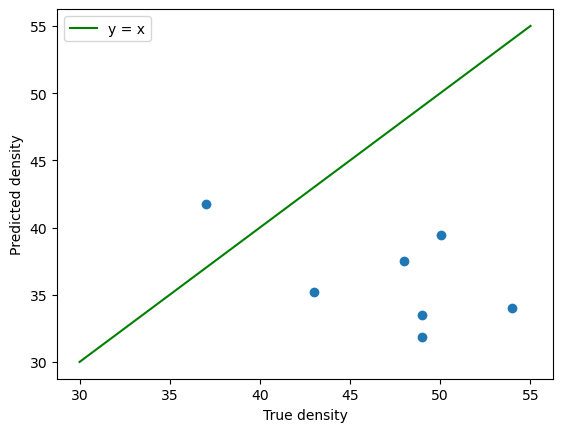

In [72]:
plt.scatter(block_0302_true_and_forecasted_values_df['True_count'], block_0302_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([30, 55], [30, 55], color='green', label='y = x')
plt.legend()
plt.show()

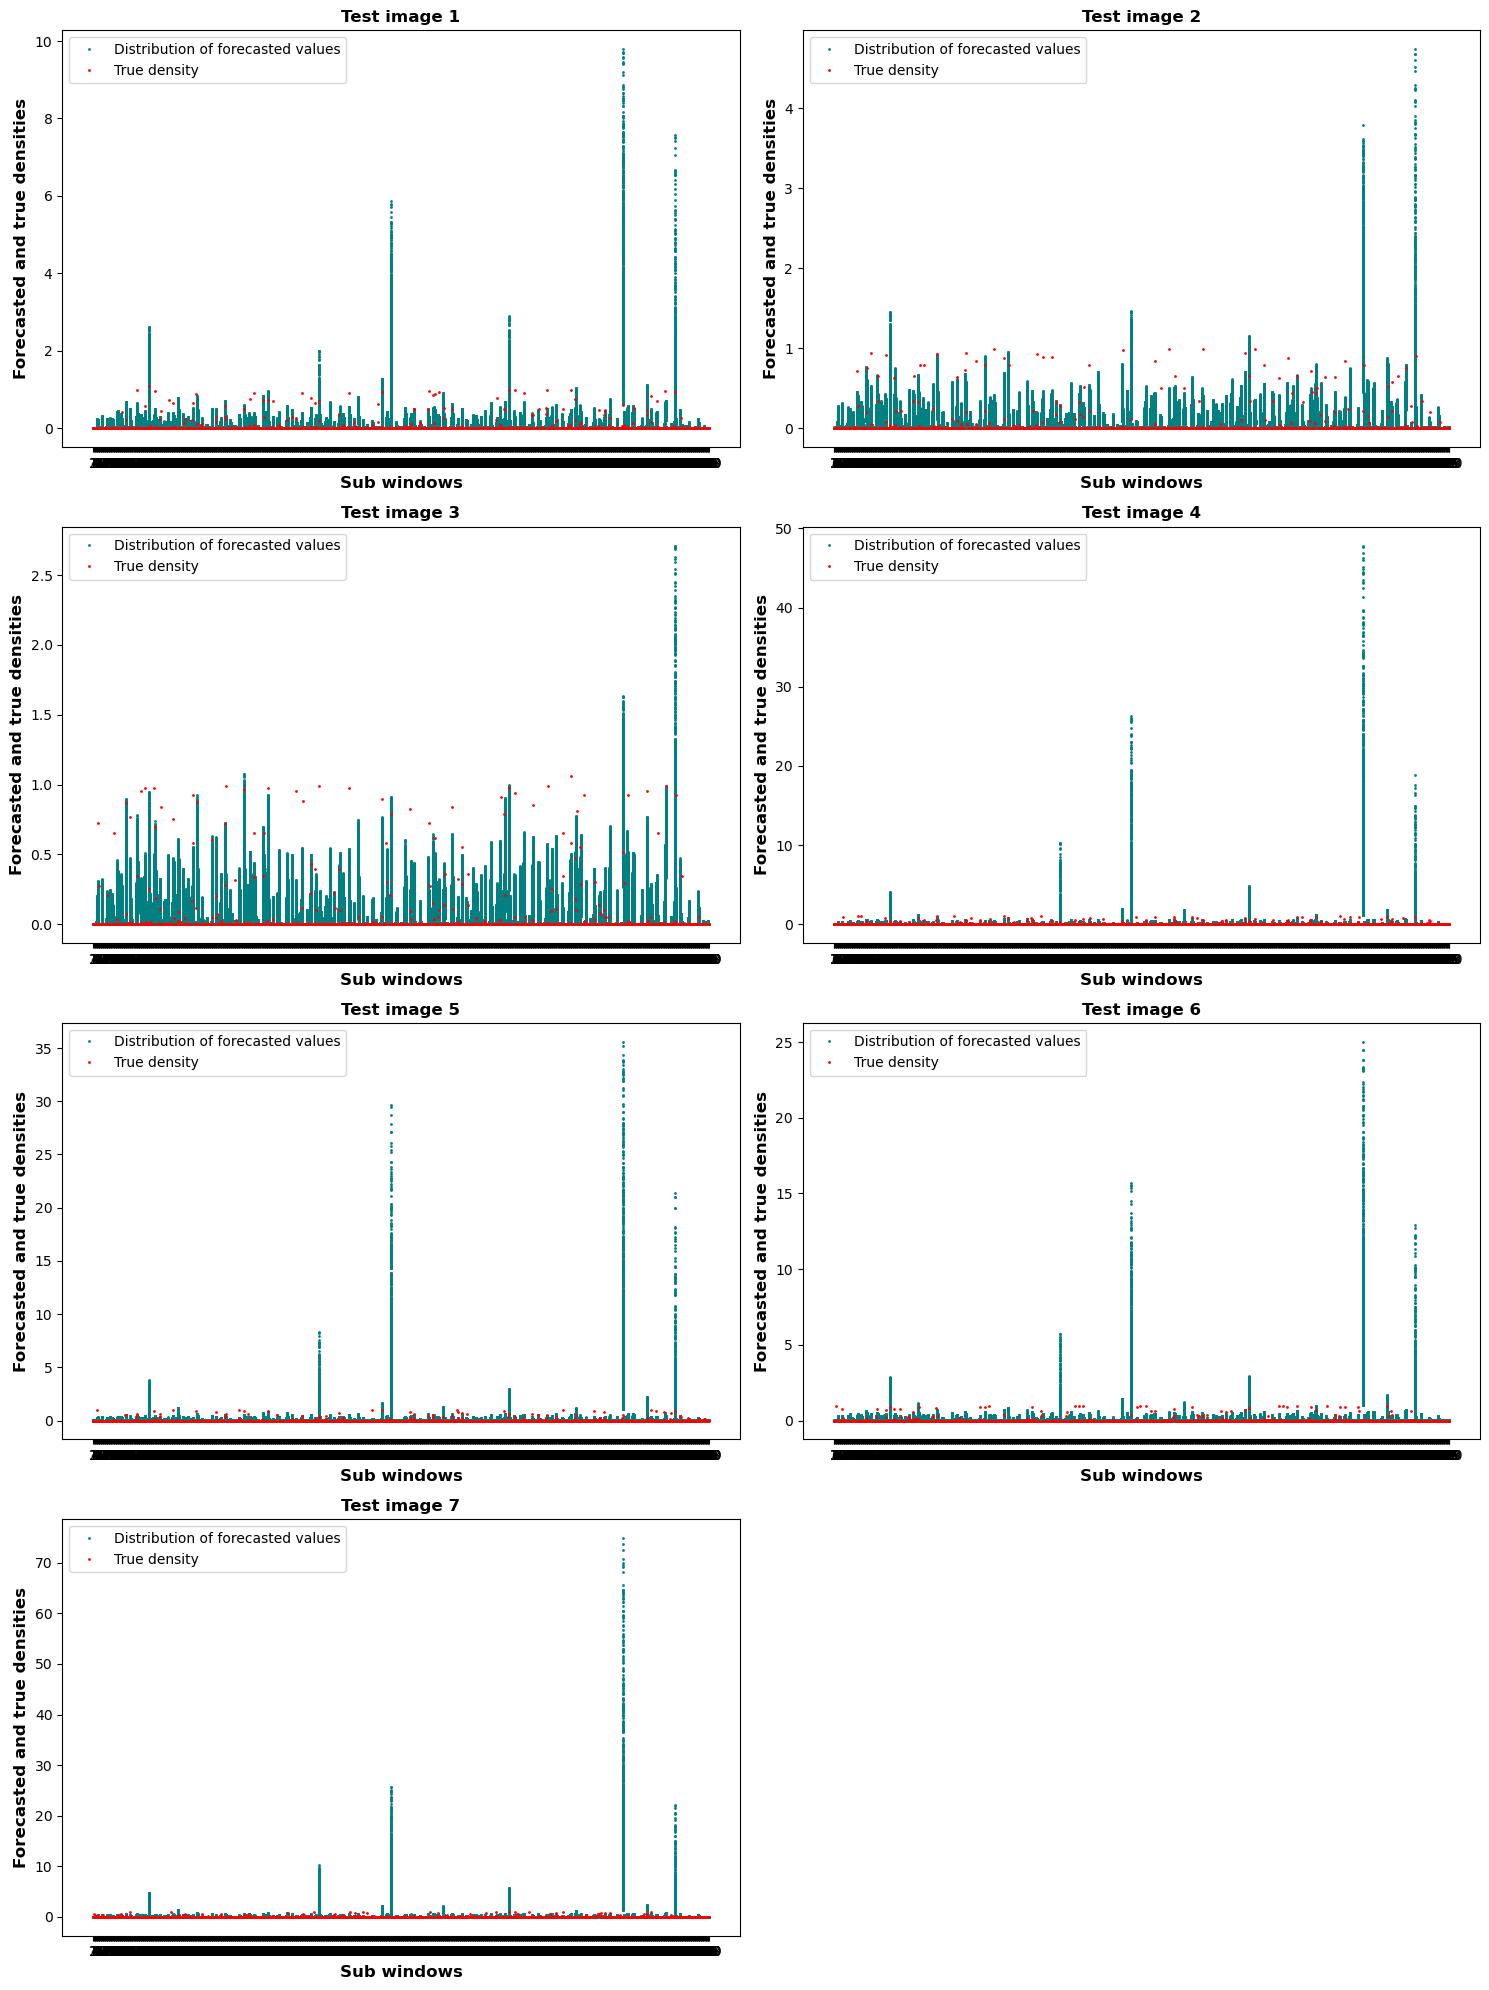

CPU times: user 26.9 s, sys: 809 ms, total: 27.7 s
Wall time: 27.4 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 